In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from stats import dm_test
import warnings
warnings.filterwarnings("ignore")

In [2]:
params = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_NORM_FINAL.csv')
params_t = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_STUD_FINAL.csv')

In [3]:
params.set_index(pd.to_datetime(params.iloc[:, 0]), inplace = True)
params = params.iloc[:, 1:]
params_t.set_index(pd.to_datetime(params_t.iloc[:, 0]), inplace = True)
params_t = params_t.iloc[:, 1:]

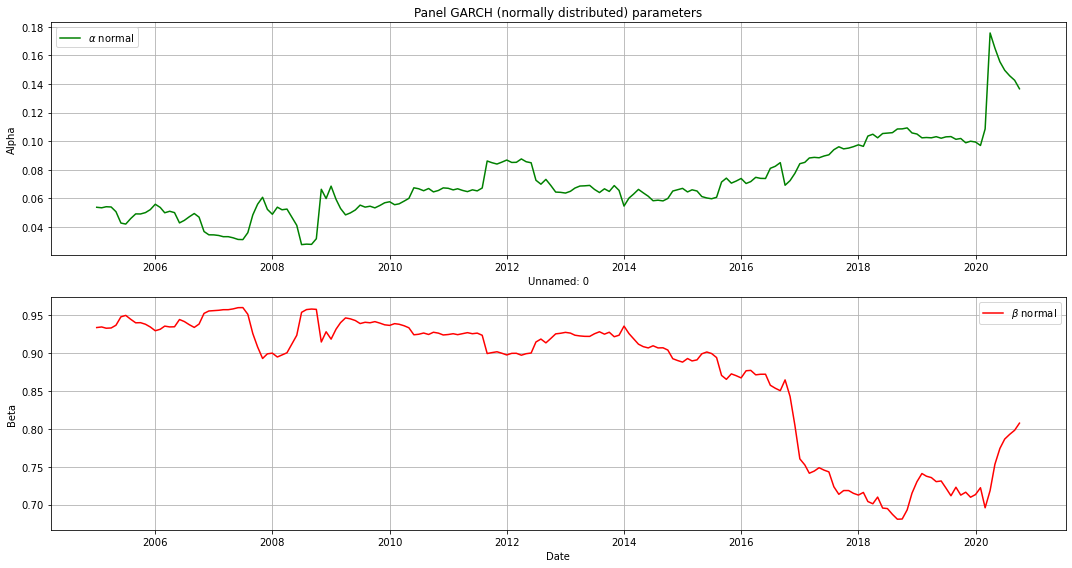

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (15,8))
ax[0].set_title('Panel GARCH (normally distributed) parameters')
sns.lineplot(pd.to_datetime(params.index), params.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

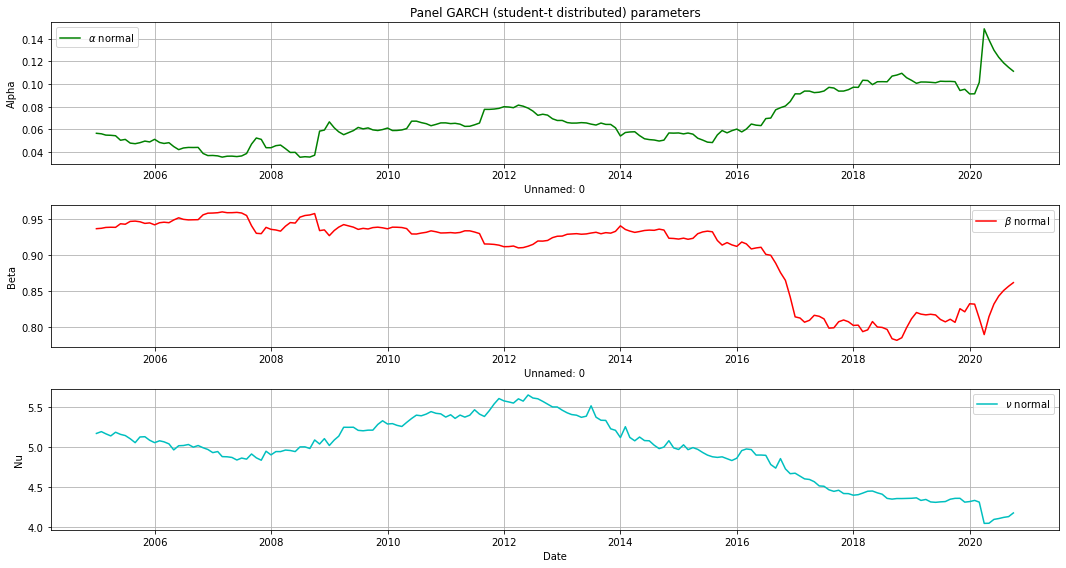

In [11]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
ax[0].set_title('Panel GARCH (student-t distributed) parameters')
sns.lineplot(pd.to_datetime(params.index), params_t.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Nu, label = r'$\nu$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

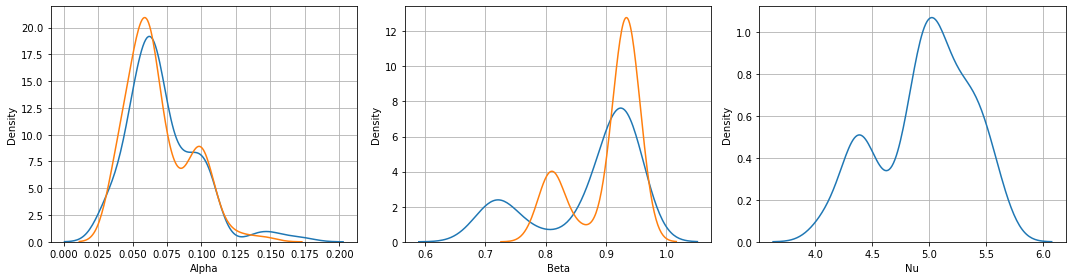

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [36]:
params_csa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_CSA/PARAMS_NORM_FINAL.csv')

In [37]:
params_csa.set_index(pd.to_datetime(params_csa.iloc[:, 0]), inplace = True)
params_csa = params_csa.iloc[:, 1:]
params_csa.iloc[105, :] = (params_csa.iloc[104, :] + params_csa.iloc[107, :]) / 2
params_csa.iloc[106, :] = (params_csa.iloc[104, :] + params_csa.iloc[107, :]) / 2

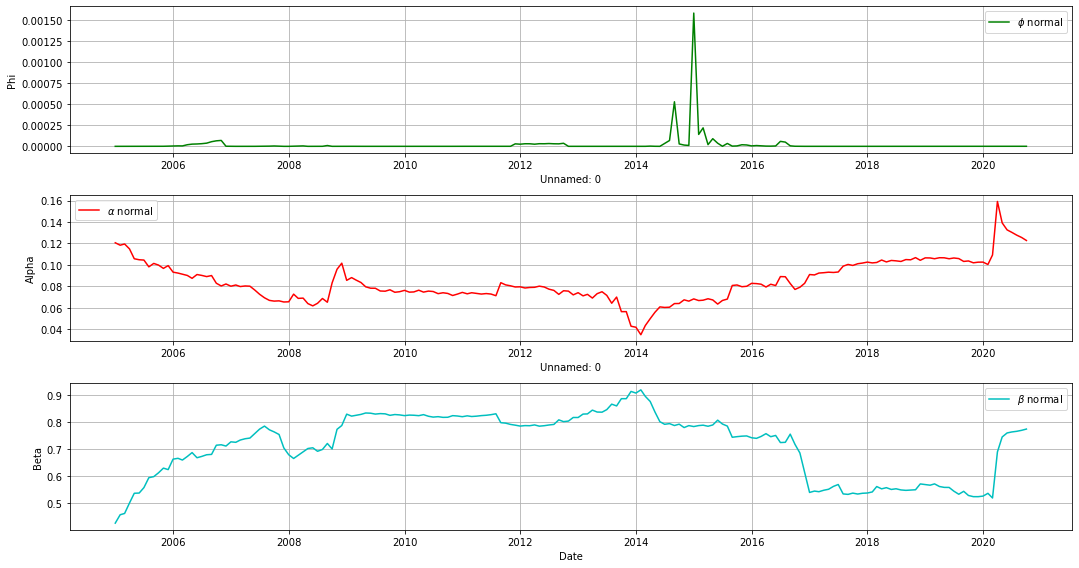

In [38]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Phi, label = r'$\phi$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Alpha, label = r'$\alpha$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Beta, label = r'$\beta$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

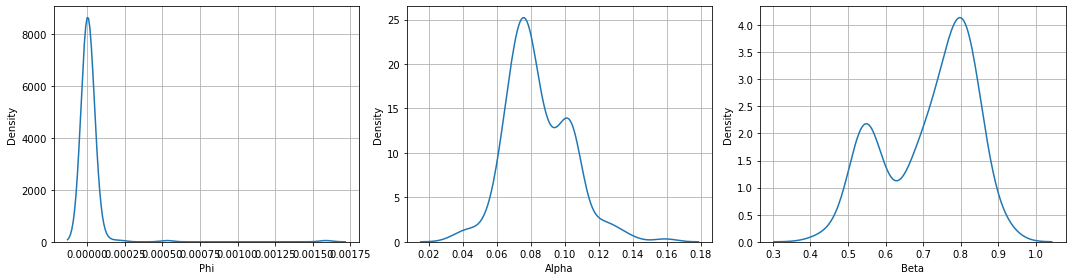

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params_csa.Phi, ax = ax[0], label = r'$\phi$')
ax[0].grid(0.2)

sns.kdeplot(params_csa.Alpha, ax = ax[1], label = r'$\alpha$')
ax[1].grid(0.2)

sns.kdeplot(params_csa.Beta, ax = ax[2], label = r'$\beta$')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

## Panel GARCH-MIDAS

In [41]:
midas_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_midas.csv')
norm_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_norm.csv')
stud_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_stud.csv')

In [42]:
midas_pars.set_index(pd.to_datetime(midas_pars.iloc[:, 0]), inplace = True)
midas_pars = midas_pars.iloc[:, 1:]
norm_pars.set_index(pd.to_datetime(norm_pars.iloc[:, 0]), inplace = True)
norm_pars = norm_pars.iloc[:, 1:]
stud_pars.set_index(pd.to_datetime(stud_pars.iloc[:, 0]), inplace = True)
stud_pars = stud_pars.iloc[:, 1:]
stud_pars.loc[stud_pars.index[102]] = stud_pars.loc[stud_pars.index[101]]

## MIDAS parameters:

## KDE plot of the $\beta$ coefficients

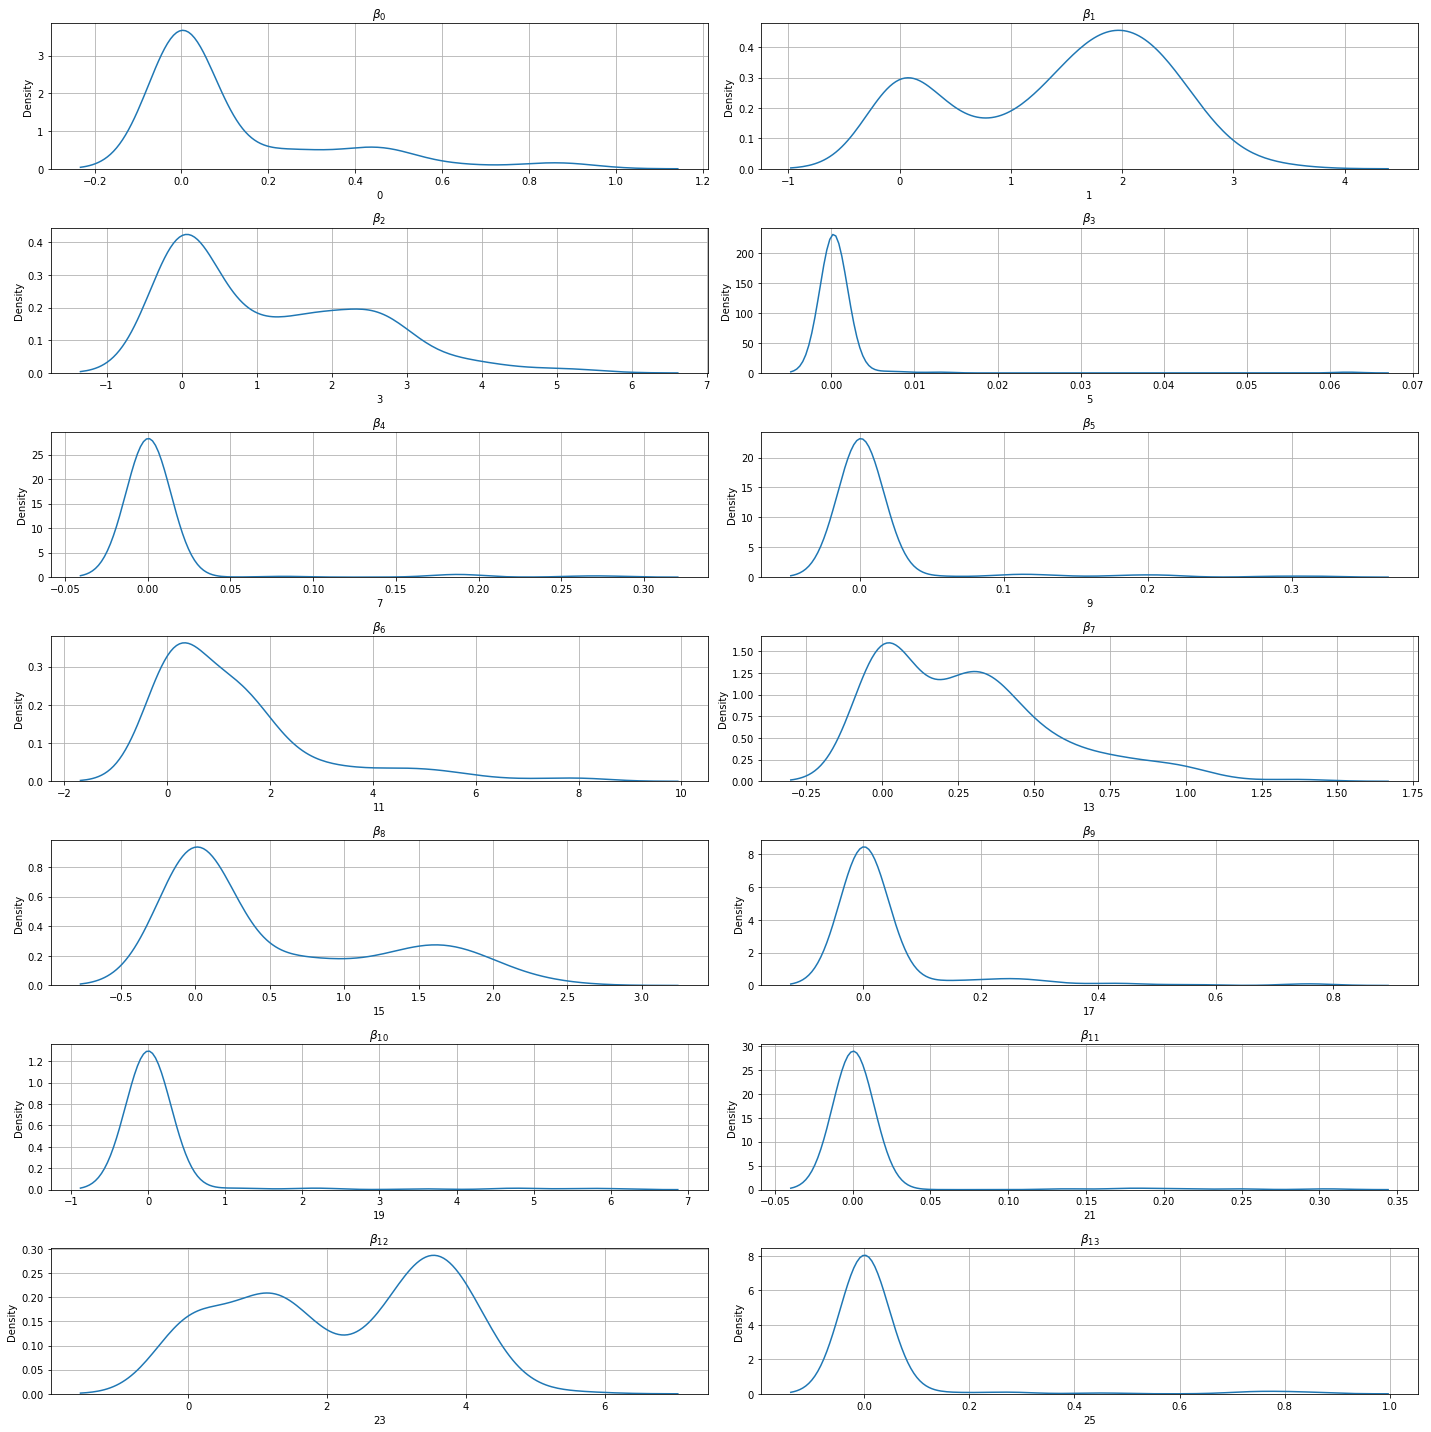

In [43]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.kdeplot(midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.kdeplot(midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.kdeplot(midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.kdeplot(midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.kdeplot(midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.kdeplot(midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.kdeplot(midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.kdeplot(midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.kdeplot(midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.kdeplot(midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.kdeplot(midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_{10}$')

sns.kdeplot(midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_{11}$')

sns.kdeplot(midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_{12}$')

sns.kdeplot(midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_{13}$')

plt.tight_layout()
plt.show()

## KDE plot of the $\theta$ parameters:

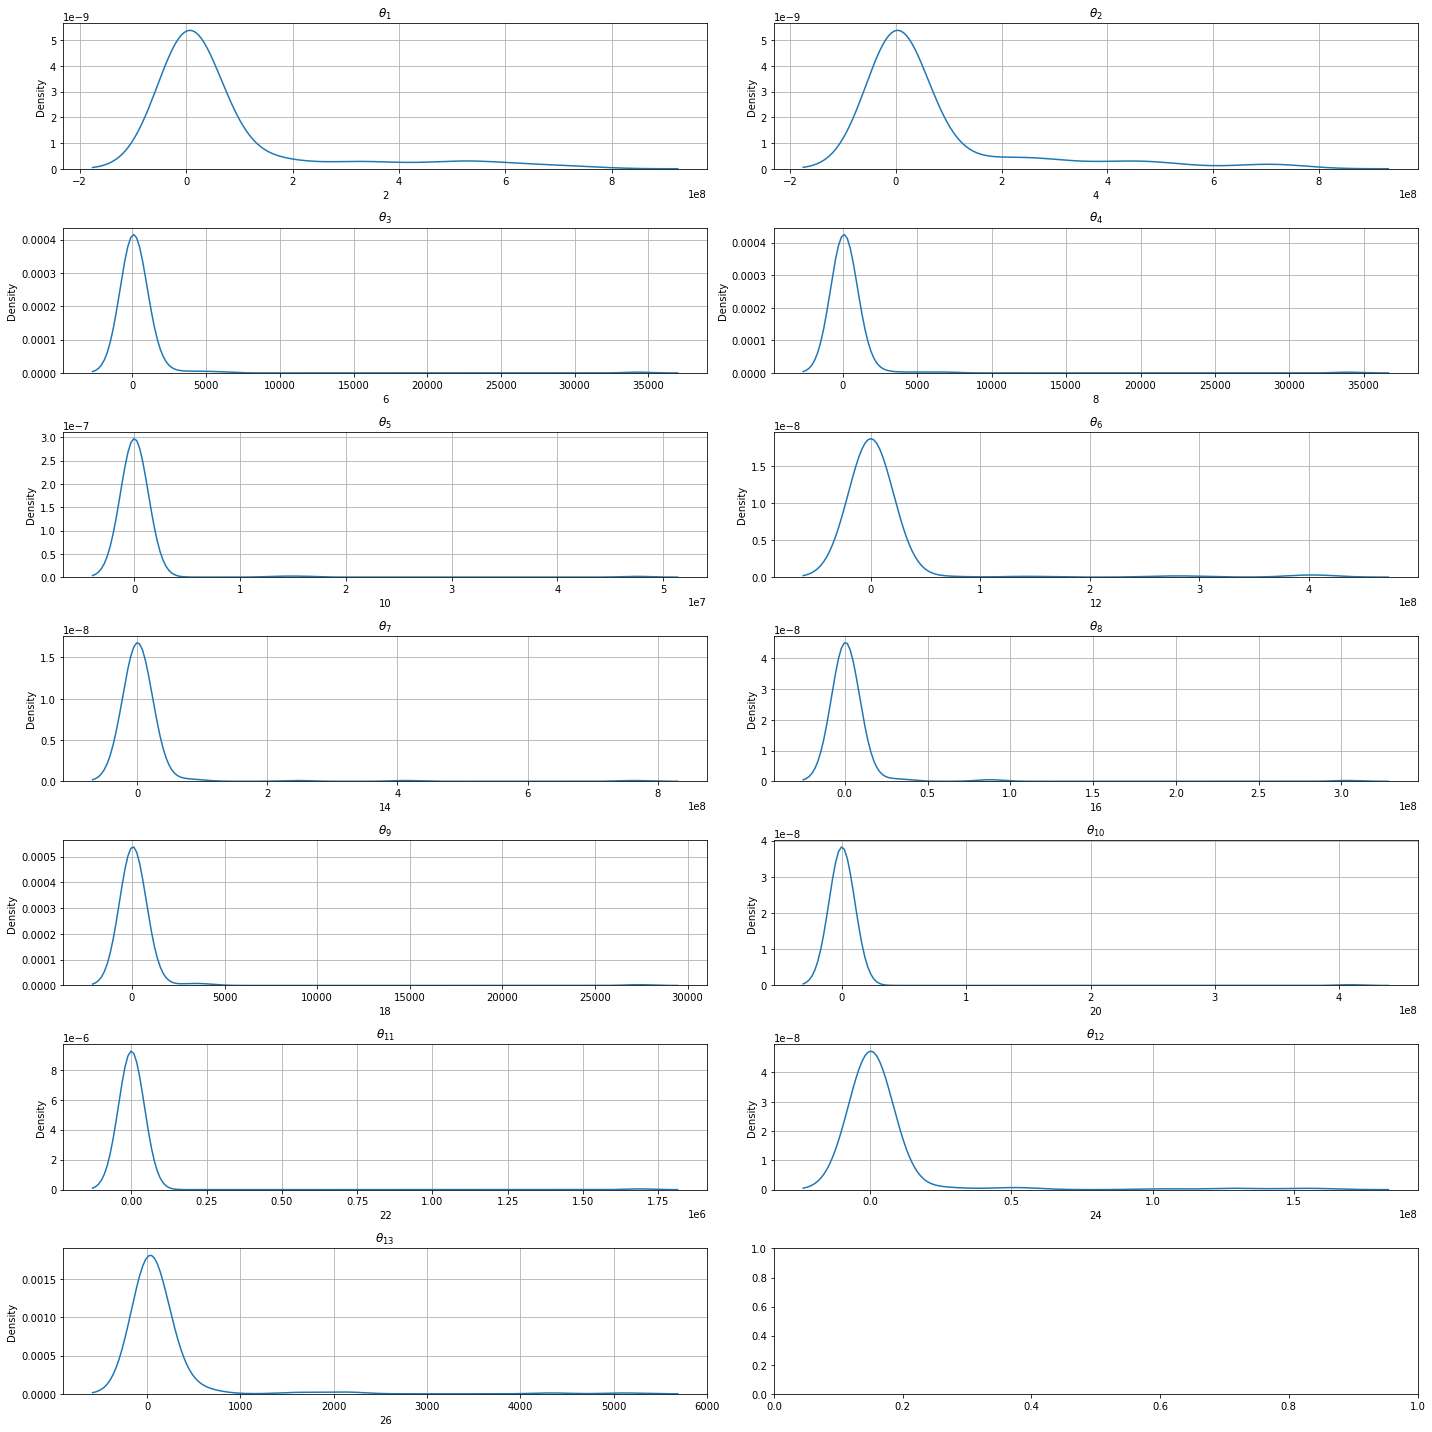

In [48]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.kdeplot(midas_pars.iloc[:, 2], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\theta_1$')

sns.kdeplot(midas_pars.iloc[:, 4], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\theta_2$')

sns.kdeplot(midas_pars.iloc[:, 6], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\theta_3$')

sns.kdeplot(midas_pars.iloc[:, 8], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\theta_4$')

sns.kdeplot(midas_pars.iloc[:, 10], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\theta_5$')

sns.kdeplot(midas_pars.iloc[:, 12], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\theta_6$')

sns.kdeplot(midas_pars.iloc[:, 14], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\theta_7$')

sns.kdeplot(midas_pars.iloc[:, 16], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\theta_8$')

sns.kdeplot(midas_pars.iloc[:, 18], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\theta_9$')

sns.kdeplot(midas_pars.iloc[:, 20], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\theta_{10}$')

sns.kdeplot(midas_pars.iloc[:, 22], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\theta_{11}$')

sns.kdeplot(midas_pars.iloc[:, 24], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\theta_{12}$')

sns.kdeplot(midas_pars.iloc[:, 26], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\theta_{13}$')


plt.tight_layout()
plt.show()

## Desctiptive statistics of the estimated parameters of the MIDAS equation:

In [50]:
midas_pars.describe()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
count,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,190.000000,1.900000e+02,...,1.900000e+02,190.000000,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,1.900000e+02,190.000000
mean,1.227198e-01,1.407576e+00,7.700631e+07,1.163437e+00,7.489587e+07,7.851194e-04,3.903533e+02,7.641459e-03,353.395595,1.164784e-02,...,3.826387e-02,257.470661,1.675324e-01,2.168545e+06,7.099386e-03,9.300807e+03,2.191608e+00,4.960301e+06,2.886063e-02,148.417597
std,2.213866e-01,9.311842e-01,1.672078e+08,1.284909e+00,1.668087e+08,4.656698e-03,2.573277e+03,3.864822e-02,2551.026433,4.549123e-02,...,1.176981e-01,2029.042907,8.357721e-01,2.962844e+07,3.789374e-02,1.223450e+05,1.476030e+00,2.254930e+07,1.327654e-01,556.460850
min,4.721444e-213,2.039063e-235,4.505933e-03,2.136368e-54,1.811421e-05,8.275225e-19,8.678997e-27,3.330037e-11,0.001260,2.478623e-35,...,9.058636e-22,0.000007,1.043619e-29,3.485762e-09,1.721183e-25,6.717396e-10,6.655221e-14,1.101083e-04,2.126236e-32,0.000007
25%,5.095128e-07,5.163822e-01,2.377863e+04,1.724291e-04,4.346231e+01,3.165482e-05,4.644825e+00,3.226706e-05,0.592407,4.192708e-05,...,2.979692e-05,0.138864,1.817465e-06,8.003130e+00,6.258828e-06,5.546598e-02,9.986332e-01,2.920967e+01,1.178350e-05,2.220733
50%,4.646198e-05,1.631117e+00,4.687692e+05,7.998730e-01,2.474399e+04,1.203328e-04,2.017202e+01,1.599686e-04,15.074054,2.191061e-04,...,1.817000e-04,3.351095,5.066049e-05,2.329162e+01,5.366383e-05,2.280889e+00,2.269953e+00,1.097166e+03,6.600263e-05,11.025104
75%,1.845295e-01,2.142613e+00,3.727100e+07,2.180648e+00,1.475743e+07,3.809660e-04,6.951778e+01,4.052035e-04,64.988619,7.624265e-04,...,1.258058e-03,28.238794,4.052051e-04,1.232330e+02,3.755561e-04,2.811257e+01,3.575798e+00,6.047118e+04,3.336854e-04,70.401895
max,9.102052e-01,3.412420e+00,7.480494e+08,5.267258e+00,7.564978e+08,6.213520e-02,3.429207e+04,2.797978e-01,33981.977848,3.193187e-01,...,7.702773e-01,27335.194034,5.991988e+00,4.084153e+08,3.043510e-01,1.686490e+06,5.505159e+00,1.596608e+08,8.569555e-01,5104.077106


## Time-series plot of the $\beta$ coefficients

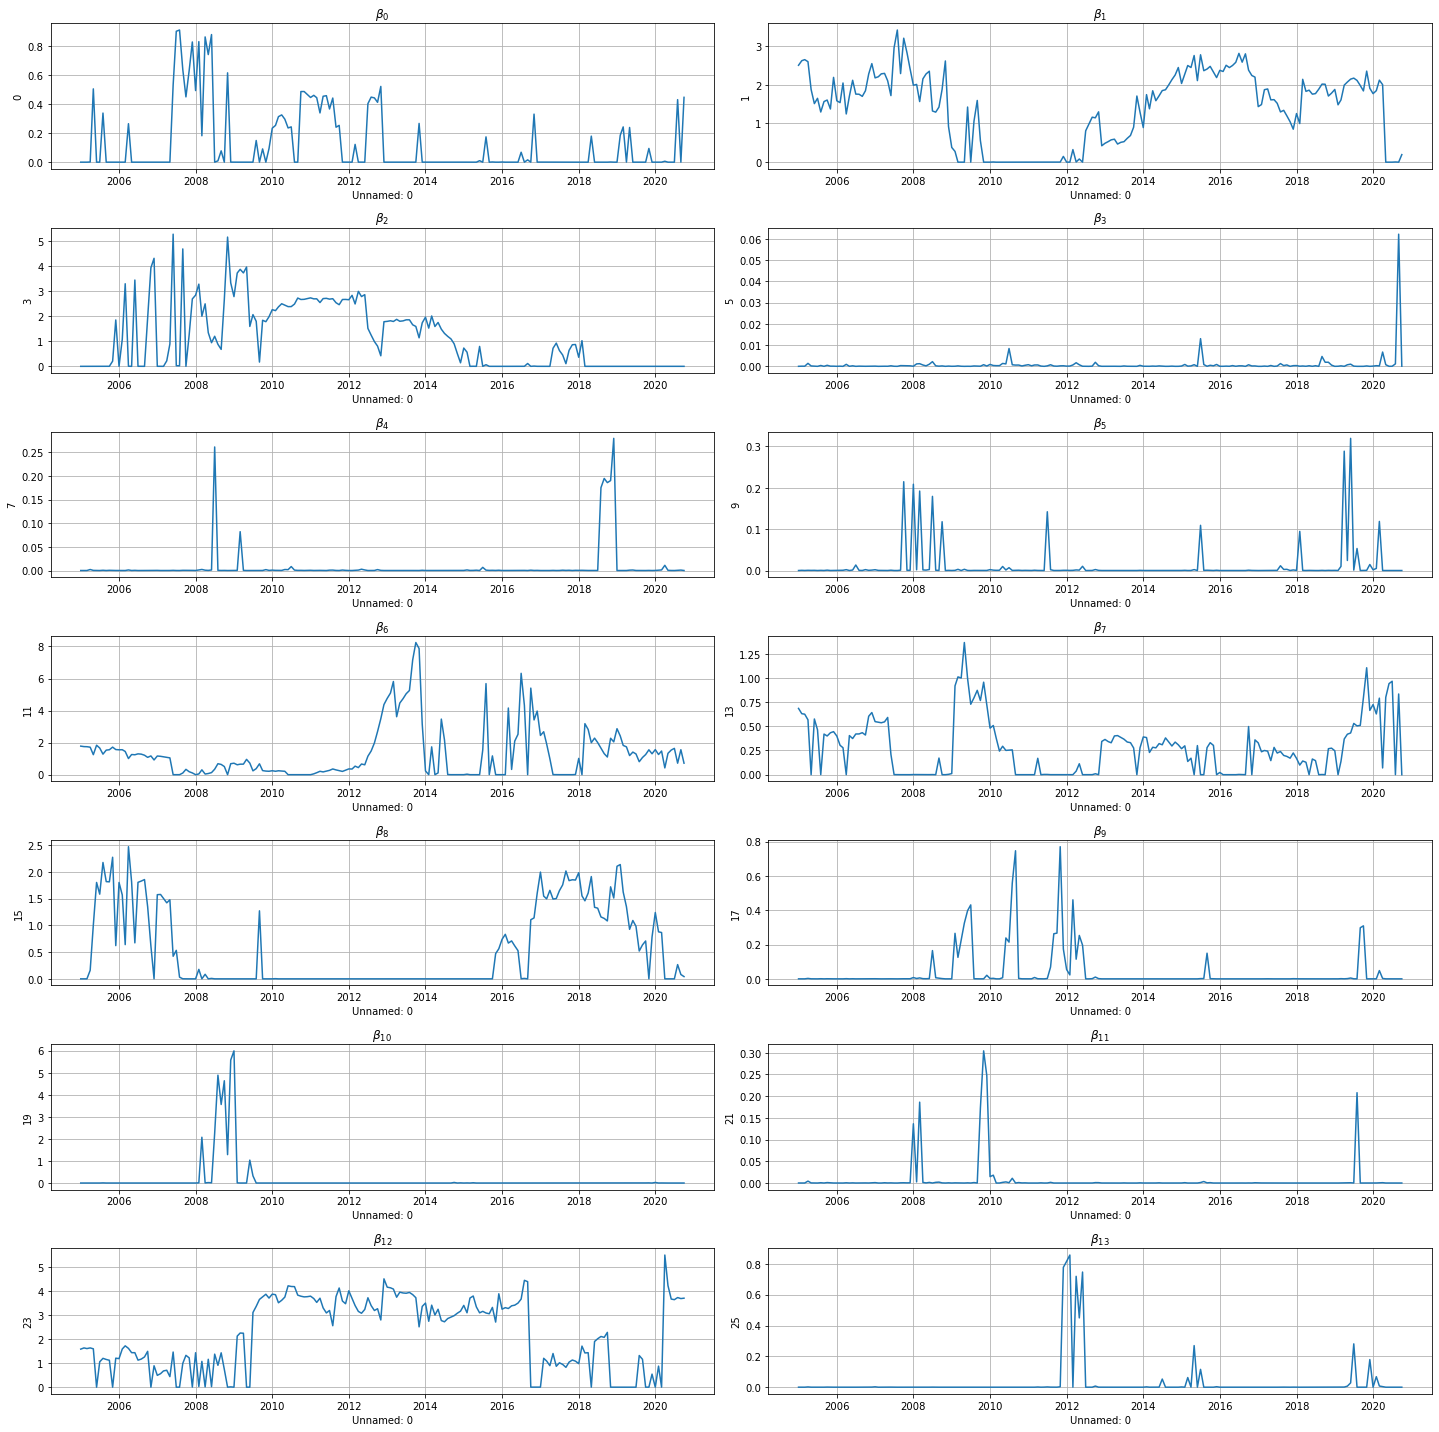

In [51]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.lineplot(midas_pars.index, midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_{10}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_{11}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_{12}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_{13}$')

plt.tight_layout()
plt.show()

## GARCH (Normal) parameters:

## KDE and time-series plot of the estimated $\alpha$ and $\beta$ parameters:

#### NOTE: $\beta$ itt is megjelenik, így a szakdolgozat leírásban a MIDAS-os résznél más görög betűre kell áttérni, hogy ne legyen benne kavarodás.

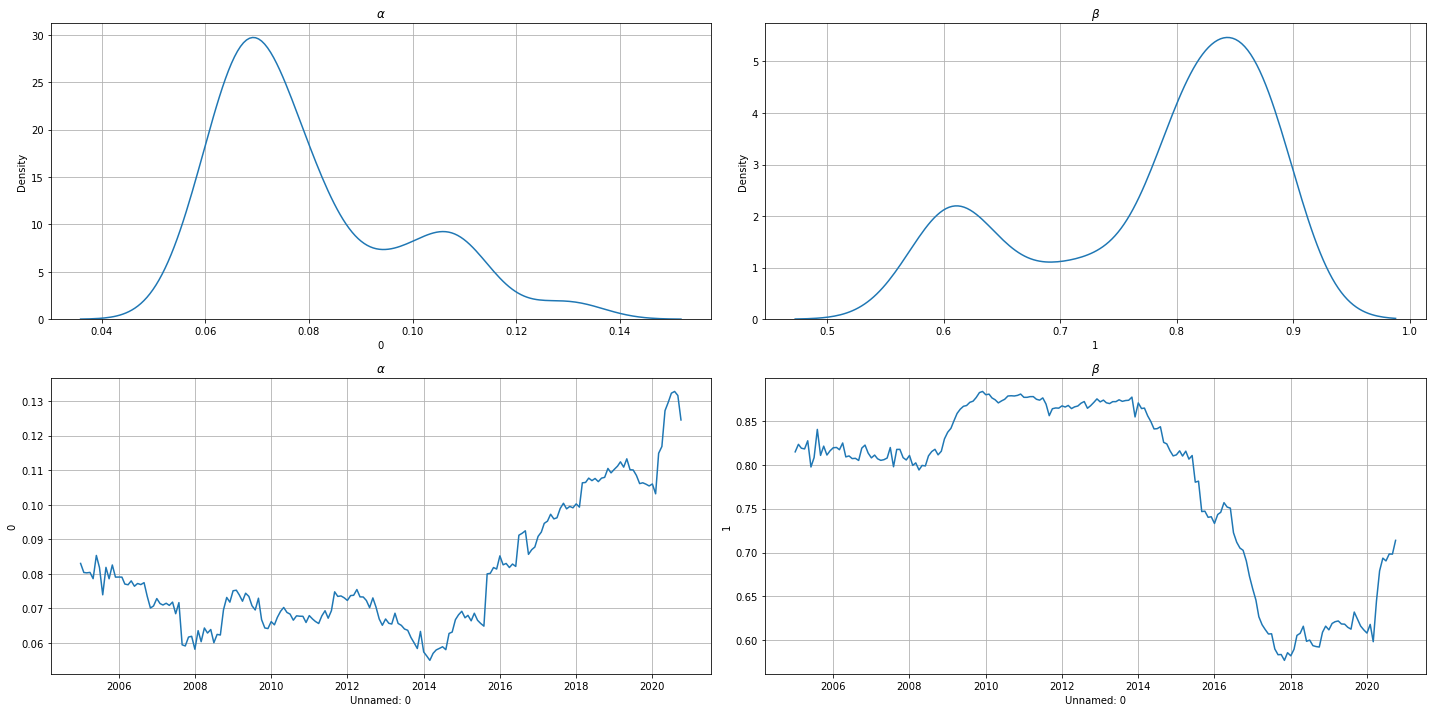

In [52]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))


sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

plt.tight_layout()
plt.show()

## GARCH (Student-t) parameters:

## KDE and time-series plot of the estimated $\alpha$, $\beta$ and $\nu$ parameters:

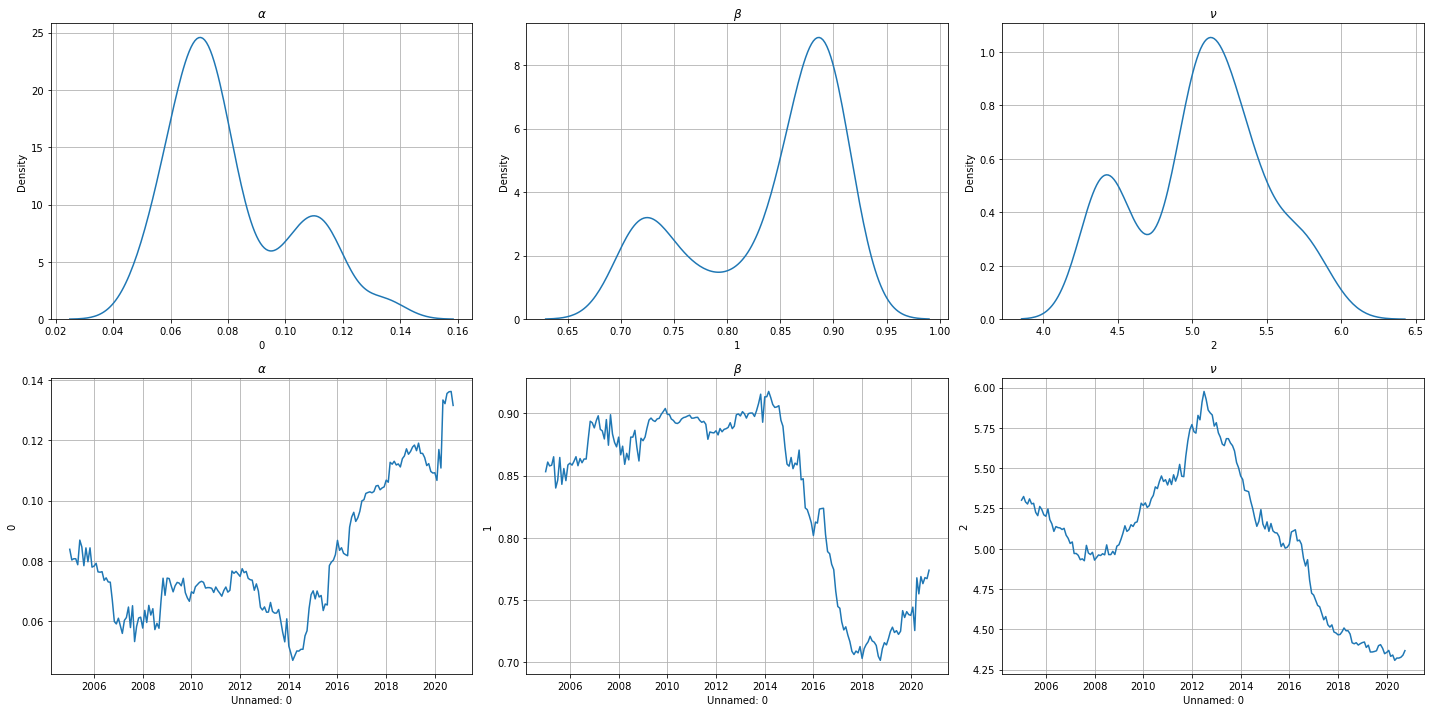

In [53]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))


sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[0][2])
ax[0][2].grid(0.2)
ax[0][2].set_title(r'$\nu$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 2], ax = ax[1][2])
ax[1][2].grid(0.2)
ax[1][2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

## Comparison between GARCH (Normal) and GARCH (Student-t) parameters:

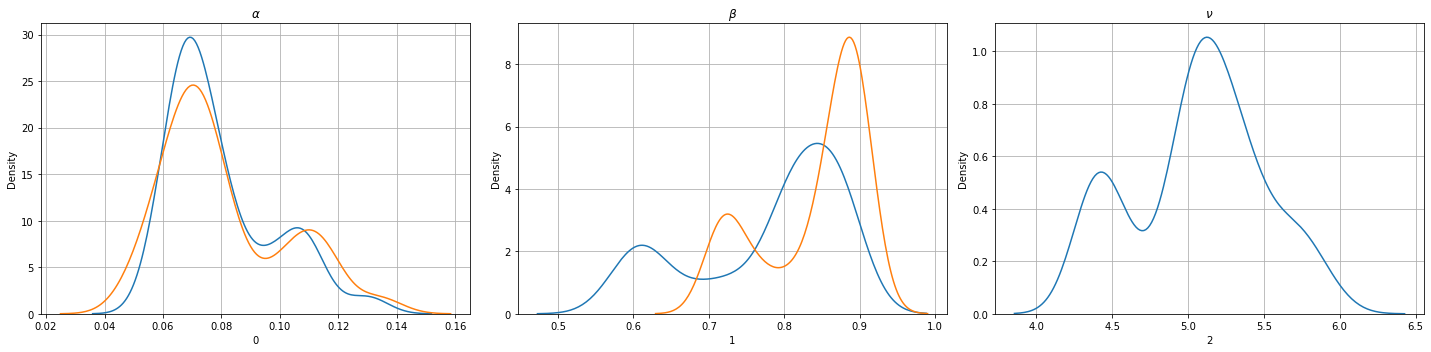

In [54]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))

sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

## Comparison between plain GARCH parameters and GARCH MIDAS parameters:

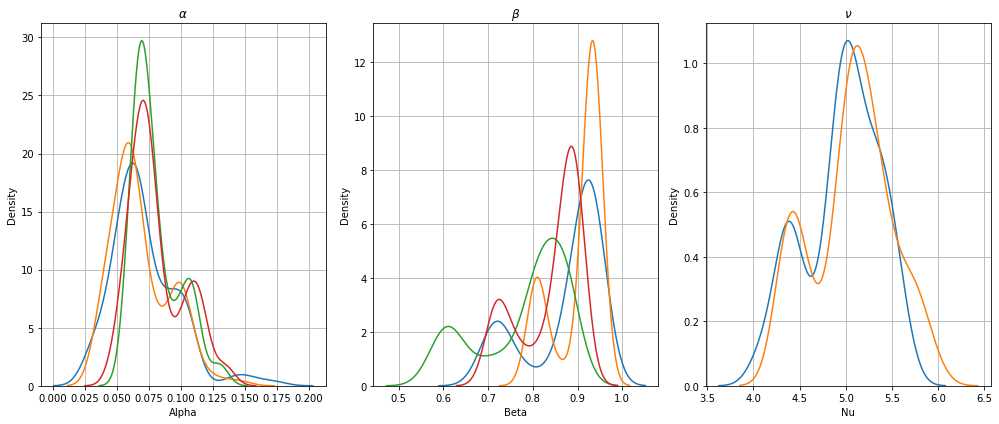

In [55]:
fig, ax = plt.subplots(1, 3, figsize = (14,6))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal G')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t GM')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal G')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t GM')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t G')
sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t GM')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()